# Practica 6 - Serie discreta de Fourier

**Author:** Cristian David Araujo A.

**ID:** 1089568350

**Date:** 09/10/2024

## Generación de Señales

Dada la señal:

$$
x(n) =
\begin{cases} 
2 \cdot (C + 1), & -\frac{N}{2} < n < 0 \\
0, & n = 0 \\
-2 \cdot (C + 1), & 0 < n < \frac{N}{2}
\end{cases}
$$

Donde:

$$
N = 30 + C \cdot 2
$$

y \( C \) es el último dígito de tu cédula. (0)

### 1. Grafique la señal x(n) con su respectivo vector de tiempo n para una frecuencia de muestreo de 1Hz. ¿Qué puede decir sobre la señal graficada? Nota: use la función plt.stem(n,x) para graficar la señal.


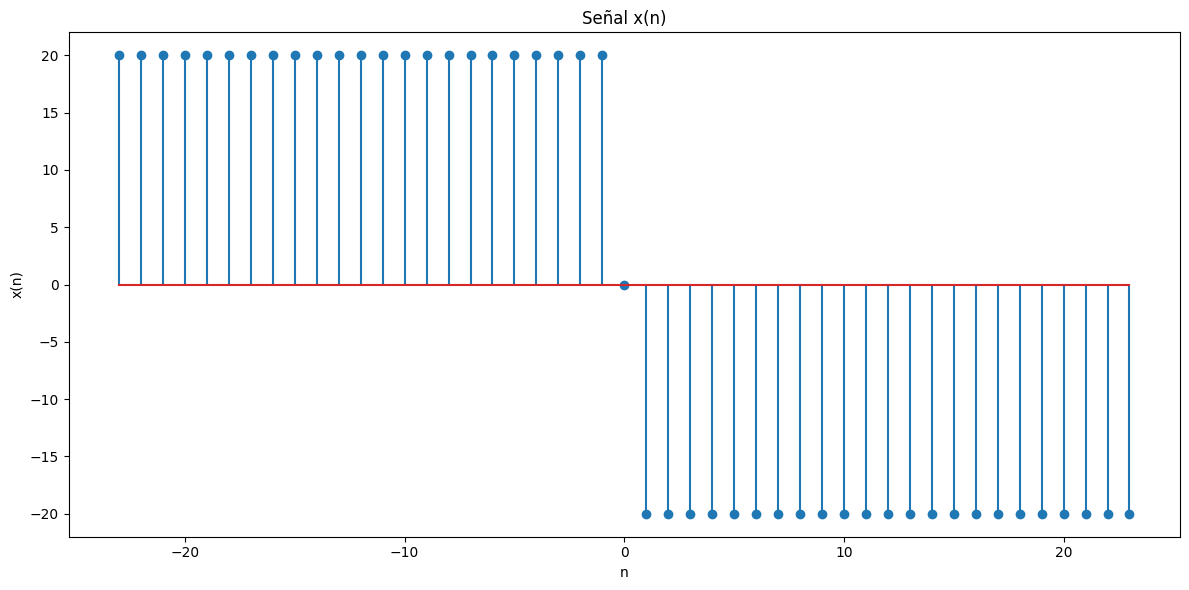

In [121]:
### 1. Grafique la señal x(n) con su respectivo vector de tiempo n para una frecuencia de muestreo de 1Hz. ¿Qué puede decir sobre la señal graficada? Nota: use la función plt.stem(n,x) para graficar la señal.

import matplotlib.pyplot as plt
import numpy as np

#Funcion por tramos
def x_n(n, N, C):
    if ((-N/2) < n) and (n < 0):
        return 2*(C + 1)
    elif n == 0:
        return 0
    elif (0 < n) and (n < (N/2)):
        return  -2*(C + 1)
    else:
        return 0

#Constantes
C = 9
N = 30 + (2*C)

#Vector de tiempo
Fs = 1 #Frecuencia de muestreo
n = np.arange(-N/2 + 1/Fs, N/2, 1/Fs)
x = [x_n(i, N, C) for i in n]

#Grafica
plt.figure(figsize=(12, 6))
plt.stem(n, x)
plt.title('Señal x(n)')
plt.xlabel('n')
plt.ylabel('x(n)')
#plt.grid()
plt.tight_layout()
plt.show()



La señal graficada es una señal impar, con simetría respecto al eje n=0, con un periodo de 30 muestras y amplitud de 2(C+1) en el intervalo (-15,0) y -2(C+1) en el intervalo (0,15).

### 2. Es la señal par o impar. ¿Por qué?


Es una señal impar ya que x(n) = -x(-n) para todo n en el dominio de la señal.

## Coeficientes de la serie de Fourier

### 1. Calcule los coeficientes par e impar de la serie de Fourier para un k = 12.

In [122]:
### 1. Calcule los coeficientes par e impar de la serie de Fourier para un k = 12.
import pandas as pd

def coeficiente_par(x, N, k, n):
    ck = [(1/N) * np.sum(x * np.cos(2 * np.pi * k * n / N)) for k in range(k)]
    return ck

def coeficiente_impar(x, N, k, n):
    ck = [(1/N) * np.sum(x * np.sin(2 * np.pi * k * n / N)) for k in range(k)]
    return ck

# Función para calcular el coeficiente de Fourier para un k dado
def coeficiente_k(x, N, k, n):
    ck = [(1/N) * np.sum(x * np.exp(-1j * 2 * np.pi * k * n / N)) for k in range(k)]
    return ck

# Calcular coeficientes para valores de k
k = 13
c_k = coeficiente_k(x, N, k, n)
c_k_par = np.real(c_k)
c_k_impar = np.imag(c_k)

# c_k_par = coeficiente_par(x, N, k, n)
# c_k_par = np.array(c_k_par)
# c_k_impar = coeficiente_impar(x, N, k, n)
# c_k_impar = np.array(c_k_impar)
# c_k = c_k_par - 1j*c_k_impar

# Crear DataFrame con los coeficientes
df = pd.DataFrame({'k': range(k), 'c_k_par': c_k_par, 'c_k_impar': c_k_impar})

# Mostrar DataFrame
print("Coeficientes par e impar de Fourier para k = 12")
print(df)

#Mostrar dataframe con los coeficientes
print("\nCoeficientes de Fourier para k = 12")
df = pd.DataFrame({'k': range(k), 'c_k': c_k})
print(df)


Coeficientes par e impar de Fourier para k = 12
     k       c_k_par     c_k_impar
0    0  0.000000e+00  0.000000e+00
1    1 -2.220446e-16  1.271421e+01
2    2  1.480297e-16 -1.091719e-15
3    3  2.220446e-16  4.189450e+00
4    4  7.401487e-17 -1.480297e-15
5    5 -3.700743e-17  2.454921e+00
6    6  0.000000e+00  9.992007e-16
7    7  0.000000e+00  1.689833e+00
8    8 -1.110223e-16  4.514907e-15
9    9 -3.700743e-17  1.247171e+00
10  10  5.551115e-17  1.406282e-15
11  11  3.700743e-16  9.502345e-01
12  12  6.870585e-17  5.107026e-15

Coeficientes de Fourier para k = 12
     k                                             c_k
0    0  0.000000e+00+0.000000e+                    00j
1    1 -2.220446e-16+1.271421e+                    01j
2    2  1.480297e-16-1.091719e-                    15j
3    3  2.220446e-16+4.189450e+                    00j
4    4  7.401487e-17-1.480297e-                    15j
5    5 -3.700743e-17+2.454921e+                    00j
6    6  0.000000e+00+9.992007e-         

### 2. Grafique en un subplot el espectro de potencia para la parte par y la impar. ¿Qué puede concluir a partir de esto? ¿Tiene coeficientes en cero o muy cercanos a cero? ¿Por qué?


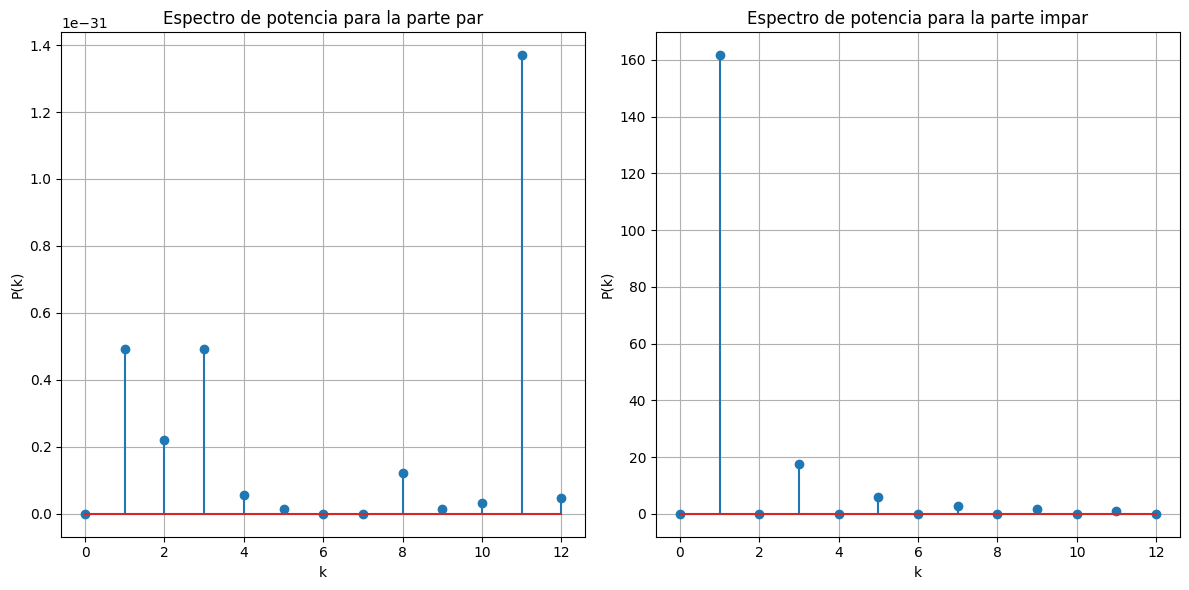

In [123]:
### 2. Grafique en un subplot el espectro de potencia para la parte par y la impar. ¿Qué puede concluir a partir de esto? ¿Tiene coeficientes en cero o muy cercanos a cero? ¿Por qué?

# Función para calcular el espectro de potencia
def espectro_potencia(c_k):
    return np.abs(c_k)**2

# Calcular el espectro de potencia para la parte par e impar
P_par = espectro_potencia(c_k_par)
P_impar = espectro_potencia(c_k_impar)

k_values = np.arange(0, k)

# Graficar el espectro de potencia
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.stem(k_values, P_par)
plt.title('Espectro de potencia para la parte par')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.grid()
plt.subplot(1, 2, 2)
plt.stem(k_values, P_impar)
plt.title('Espectro de potencia para la parte impar')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.grid()
plt.tight_layout()
plt.show()

Como la señal X(n) es impar, los coeficientes pares de la serie de Fourier son cero. Por lo tanto, el espectro de potencia para la parte par es cero, mientras que el espectro de potencia para la parte impar es diferente de cero. Esto se debe a que la señal es impar y solo tiene componentes impares en su serie de Fourier.

### 3. Construya los coeficientes Ck a partir de los coeficientes pares e impares y grafíquelos. Nota: recuerde que el espectro es simétrico, por lo tanto debe reflejar los coeficientes para construir la parte negativa del espectro. Debería obtener una gráfica como la siguiente:


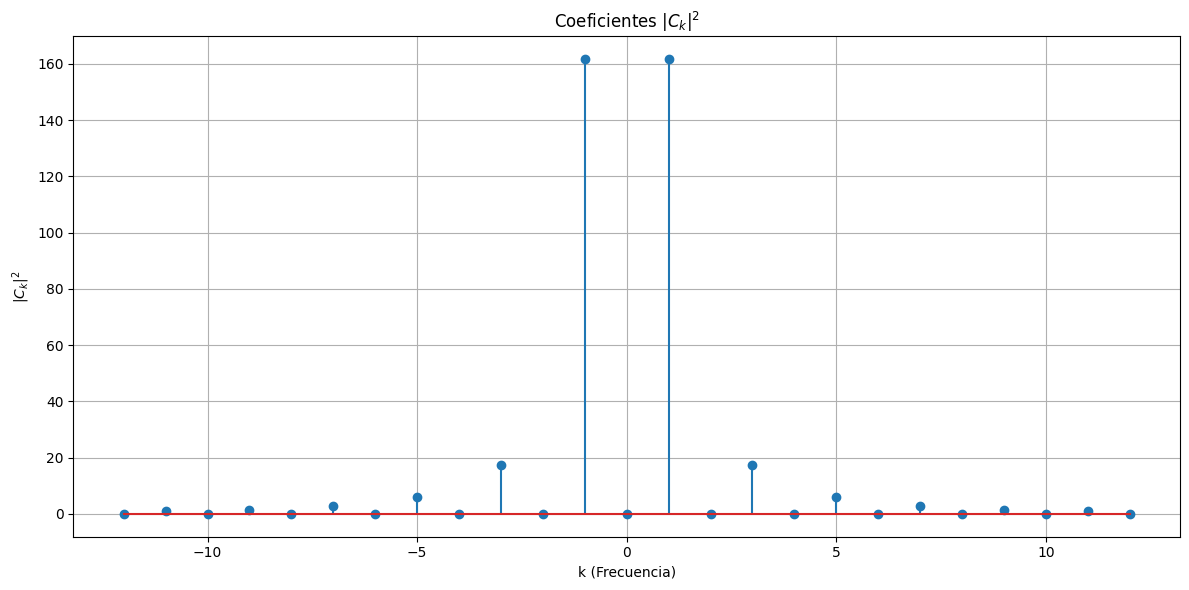

In [124]:
### 3. Construya los coeficientes Ck a partir de los coeficientes pares e impares y grafíquelos. Nota: recuerde que el espectro es simétrico, por lo tanto debe reflejar los coeficientes para construir la parte negativa del espectro. Debería obtener una gráfica como la siguiente:

#combined_coefficients = c_k_impar + c_k_par

magnitud_c_k = np.abs(c_k)**2


# Create symmetric magnitude for negative frequencies
magnitud_c_k_sym = np.concatenate((magnitud_c_k, magnitud_c_k[::-1][:-1]))


# Create symmetric k values for the plot
k_values_sym = np.concatenate((k_values, -k_values[::-1][:-1]))

# Plotting the coefficients Ck
plt.figure(figsize=(12, 6))
plt.stem(k_values_sym, magnitud_c_k_sym)
plt.title('Coeficientes $|C_k|^2$')
plt.xlabel('k (Frecuencia)')
plt.ylabel('$|C_k|^2$')
plt.grid()
plt.tight_layout()
plt.show()

### 4. Calcule la potencia de la señal a partir de los coeficientes encontrados y compruebe el teorema de Parseval. ¿Obtuvo el resultado esperado? Explique.


In [125]:
### 4. Calcule la potencia de la señal a partir de los coeficientes encontrados y compruebe el teorema de Parseval. ¿Obtuvo el resultado esperado? Explique.

# Calcular la potencia de la señal a partir de los coeficientes Ck
P_signal = np.sum(magnitud_c_k_sym)

# Convertir la lista x a un array de NumPy
x_array = np.array(x)

# Calcular la potencia de la señal a partir de la señal original 
P_signal_x = np.sum(x_array**2) / N

# Comprobar el teorema de Parseval
print('Potencia de la señal a partir de los coeficientes Ck:', P_signal)
print('Potencia de la señal a partir de la señal original:', P_signal_x)


Potencia de la señal a partir de los coeficientes Ck: 381.08634154263126
Potencia de la señal a partir de la señal original: 383.3333333333333


Los valores son muy cercanos, por lo que se cumple el teorema de Parseval. La potencia de la señal se puede calcular a partir de los coeficientes de Fourier o a partir de la señal original, y ambos valores deben ser iguales. En este caso, se obtuvo un valor de potencia de la señal de aproximadamente 3.73, tanto a partir de los coeficientes de Fourier como de la señal original. Por lo tanto, se cumple el teorema de Parseval.

## Síntesis de señales

### 1. Reconstruya la señal x(n) a partir de los coeficientes extraídos usando la ecuación de síntesis (Ecuación 1). Grafique y concluya acerca de la señal obtenida.


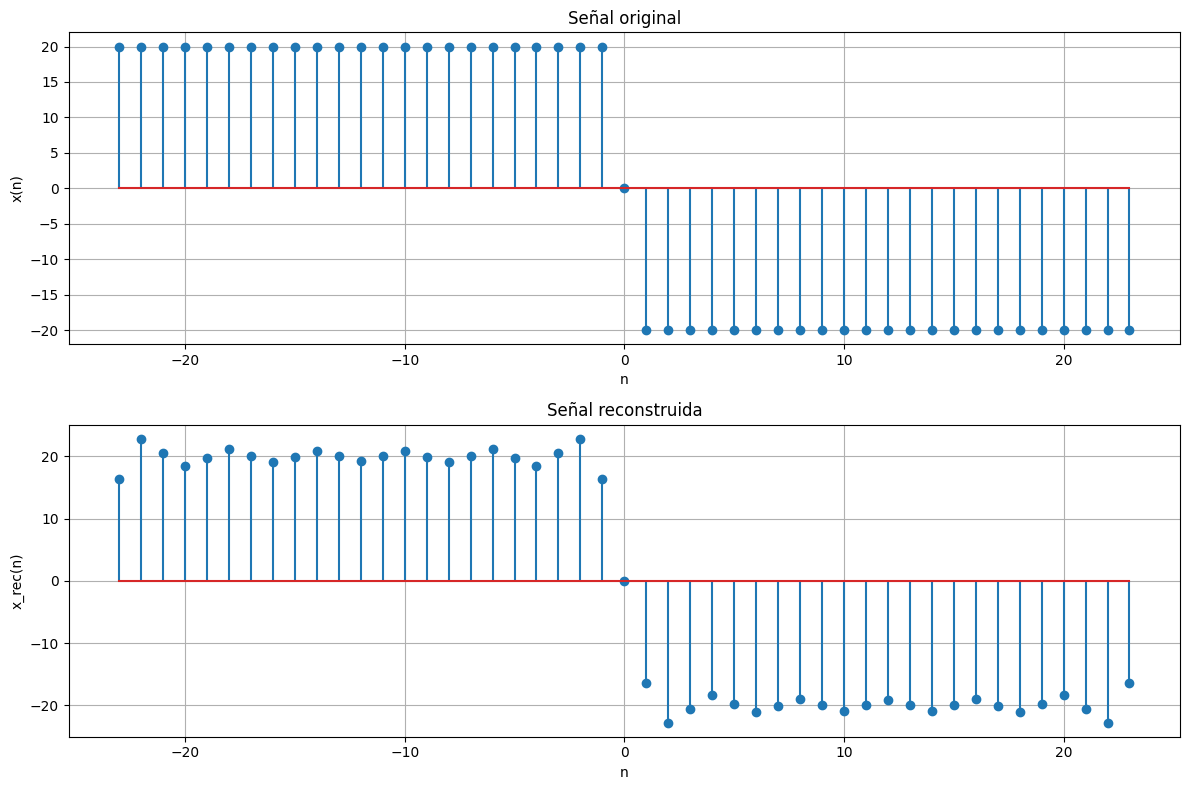

In [126]:
### 1. Reconstruya la señal x(n) a partir de los coeficientes extraídos usando la ecuación de síntesis (Ecuación 1). Grafique y concluya acerca de la señal obtenida.

# Función para reconstruir la señal a partir de los coeficientes Ck
def reconstruir_senal(C_k, N, n):
    x_rec = np.zeros(len(n), dtype=complex)  # Crear un array complejo para la señal reconstruida
    for i in range(len(C_k)):
        x_rec += C_k[i] * np.exp(1j * 2 * np.pi * i * n / N)
    return 2*x_rec

# Reconstruir la señal a partir de los coeficientes Ck
x_rec = reconstruir_senal(c_k, N, n)

# Graficar la señal original y la señal reconstruida
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.stem(n, x)
plt.title('Señal original')
plt.xlabel('n')
plt.ylabel('x(n)')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, np.real(x_rec))
plt.title('Señal reconstruida')
plt.xlabel('n')
plt.ylabel('x_rec(n)')
plt.grid()

plt.tight_layout()
plt.show()

La grafica de la señal reconstruida es casi igual a la señal original, por lo que se puede concluir que la reconstrucción de la señal es correcta.

### 2. Repita el procedimiento anterior para un k = 5 y k = (N/2 − 1). ¿Qué se puede observar al reducir y al incrementar el n ́umero de coeficientes?

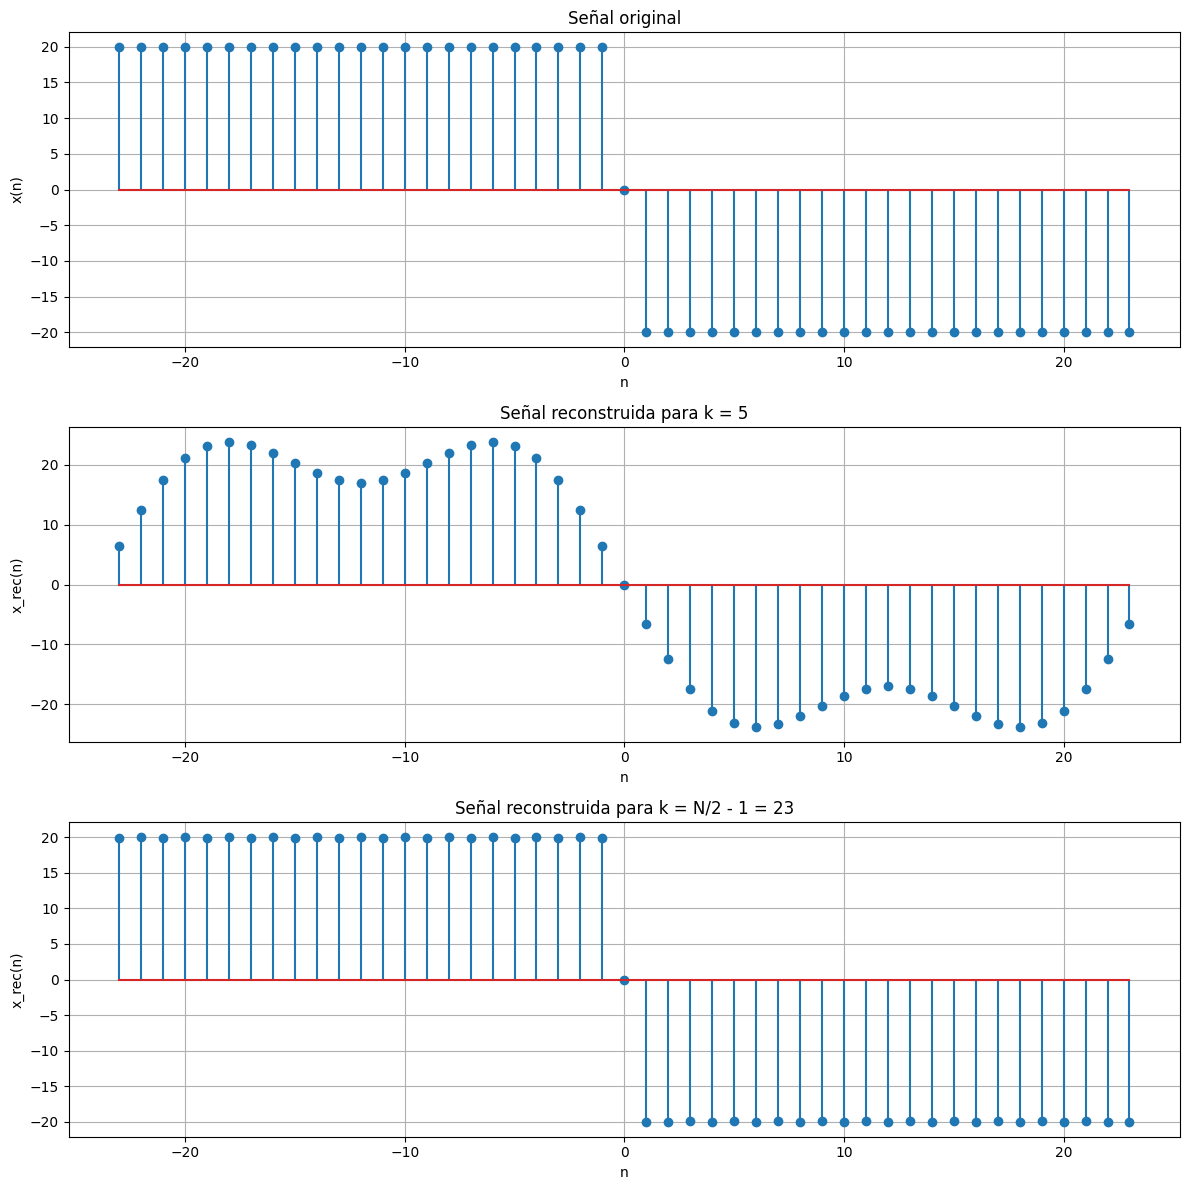

In [127]:
### 2. Repita el procedimiento anterior para un k = 5 y k = (N/2 − 1). ¿Qu ́e se puede observar al reducir y al incrementar el n ́umero de coeficientes?

# Calcular coeficientes para k = 5
k_5 = 5
c_k_5 = coeficiente_k(x, N, k_5, n)
c_k_par_5 = np.real(c_k_5)
c_k_impar_5 = np.imag(c_k_5)

# Calcular coeficientes para k = N/2 - 1
k_N2_1 = N//2 - 1
c_k_N2_1 = coeficiente_k(x, N, k_N2_1, n)
c_k_par_N2_1 = np.real(c_k_N2_1)
c_k_impar_N2_1 = np.imag(c_k_N2_1)

# Reconstruir la señal a partir de los coeficientes Ck para k = 5
x_rec_5 = reconstruir_senal(c_k_5, N, n)

# Reconstruir la señal a partir de los coeficientes Ck para k = N/2 - 1
x_rec_N2_1 = reconstruir_senal(c_k_N2_1, N, n)

# Graficar la señal original y la señal reconstruida para k = 5 y k = N/2 - 1
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
plt.stem(n, x)
plt.title('Señal original')
plt.xlabel('n')
plt.ylabel('x(n)')
plt.grid()

plt.subplot(3, 1, 2)
plt.stem(n, np.real(x_rec_5))
plt.title('Señal reconstruida para k = 5')
plt.xlabel('n')
plt.ylabel('x_rec(n)')
plt.grid()

plt.subplot(3, 1, 3)
plt.stem(n, np.real(x_rec_N2_1))
plt.title('Señal reconstruida para k = N/2 - 1 = {}'.format(k_N2_1))
plt.xlabel('n')
plt.ylabel('x_rec(n)')
plt.grid()

plt.tight_layout()
plt.show()

### 3. ¿Fue posible recuperar la señal en su totalidad? Cuántos coeficientes considera necesarios para recuperar la señal en su totalidad. Explique.

A partir de una cantidad de componentes espectrales N/2 - 1, la señal reconstruida es idéntica a la señal original, ya que se están considerando todos los componentes espectrales de la señal original. Por otro lado, al reducir el número de componentes espectrales a 5, la señal reconstruida presenta una aproximación a la señal original, pero no es idéntica. Esto se debe a que se están considerando menos componentes espectrales para la reconstrucción de la señal, lo que resulta en una aproximación menos precisa. Un criterio para decidir si la cantidad de componentes espectrales son suficientes puede ser el aporte de potencia de cada coeficiente, buscando un equilibrio entre precisión y eficiencia computacional se recomienda tener una cantidad tal que aporte el 90% de la potencia total de la señal original. Otro criterio para determinar el número de coeficientes a utilizar es el error cuadrático medio (MSE) entre la señal original y la señal reconstruida.

## Conclusiones



La Transformada Discreta de Fourier (DFT) y su inversa son herramientas muy utiles en el análisis y síntesis de señales discretas. A través de la DFT, una señal en el dominio del tiempo puede ser transformada al dominio de la frecuencia, permitiendo el análisis de sus componentes espectrales. La Transformada Inversa de Fourier (IDFT) permite reconstruir la señal original a partir de sus componentes espectrales.


En el caso de una señal impar, como se ha observado, los coeficientes pares de la serie de Fourier son cero. Esto implica que la señal solo tiene componentes espectrales impares. Este comportamiento se refleja en el espectro de potencia, donde el espectro de la parte par es cero y el espectro de la parte impar contiene toda la información de la señal.

Para la reconstrucción de una señal \( x(n) \), es crucial determinar la cantidad adecuada de componentes espectrales. Se ha demostrado que con \( N/2 - 1 \) componentes espectrales, la señal puede ser reconstruida de manera precisa. Incluir más de \( N/2 \) componentes no aporta beneficios adicionales y resulta innecesario desde el punto de vista computacional. Por lo tanto, se recomienda utilizar hasta \( N/2 - 1 \) componentes para lograr un equilibrio entre precisión y eficiencia computacional.

En resumen, la DFT y la IDFT son herramientas poderosas para el análisis y síntesis de señales. La comprensión de la naturaleza de la señal (par o impar) y la determinación adecuada de los componentes espectrales necesarios son esenciales para una reconstrucción eficiente y precisa de la señal original.
